# 기업프로젝트 대비 OCR 맛보기

## 0. 참고한 자료

YouTube : 토크ON세미나 파이썬 OpenCV 입문특강 3 ~ 5강

## 1. 이미지 처리하기

### 1-1. 데이터 불러오기

In [ ]:
import sys
import cv2
from matplotlib import pyplot as plt

test1 = cv2.imread('/opt/ml/OCR_test/test_image/test1.jpg')
test2 = cv2.imread('/opt/ml/OCR_test/test_image/test2.jpg')
test3 = cv2.imread('/opt/ml/OCR_test/test_image/test3.jpg')
test4 = cv2.imread('/opt/ml/OCR_test/test_image/test4.jpg')
test5 = cv2.imread('/opt/ml/OCR_test/test_image/test5.jpg')
test6 = cv2.imread('/opt/ml/OCR_test/test_image/test6.jpg')
test7 = cv2.imread('/opt/ml/OCR_test/test_image/test7.jpg')
test8 = cv2.imread('/opt/ml/OCR_test/test_image/test8.jpg')
test9 = cv2.imread('/opt/ml/OCR_test/test_image/test9.jpg')
test_images = [test1,test2,test3,test4,test5,test6,test7,test8,test9]

# 오류 검출
for idx, image in enumerate(test_images) : 
    if image is None : 
        print(f'{idx}번째 이미지 파일에 오류가 발견되었습니다!')
        sys.exit()

for image in test_images : 
    # 0. before
    vanila_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 1.  BGR -> gray
    gray_temp_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 2. gray -> RGB
    temp_image = cv2.cvtColor(gray_temp_image, cv2.COLOR_BGR2RGB)
    
    bgr_gray = cv2.cvtColor(gray_temp_image, cv2.COLOR_GRAY2BGR)
    
    # 3. gray(RGB) -> threshold : 이진화 작업
    # _, image_bin = cv2.threshold(temp_image, 150, 255, cv2.THRESH_BINARY)
    # 자동 임계값 결정 방법 : Otsu
    threshold_num, image_bin = cv2.threshold(gray_temp_image, 0, 255, 
                                 cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    threshold_image = cv2.cvtColor(image_bin, cv2.COLOR_BGR2RGB)
    
    # 4. 레이블링 & 외곽선 검출
    # RETR_EXTERNAL : 최외곽 검출
    # RETR_LIST : 전부검출
    # CHAIN_APPROX_NONE : 근사화 없음
    # CHAIN_APPROX_SIMPLE : 근사화 시킴
    
    contours, _ = cv2.findContours(image_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for pts in contours :
        # 외곽선 단순화
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)
        
        # 면적 좁은경우 contours 무시
        if cv2.contourArea(pts) < 1000 : 
            continue
        # 만약 사각형이 아니면 버리기
        # 범위 설정하니까 쫌 낫다
        if (2 > len(approx)) | (8 < len(approx))  : 
            continue
        
        cv2.polylines(bgr_gray, pts, True, (0,255,0),10)
        # cv2.fillPoly(bgr_gray, pts, (0,0,255))
    
    contours_image = cv2.cvtColor(bgr_gray, cv2.COLOR_BGR2RGB)
    
    # 면적 구하기;
    # 외곽선 길이 구하기
    # 바운딩 박스(외곽선을 외접하여 둘러싸는 가장 작은 사각형) 구하기
    # 바운딩 서클(외곽선을 외곽선을 외접하여 둘러싸는 가장 작은 원) 구하기
    # 외곽선 근사화

    
    
    
#     print("Before Processing")
#     plt.imshow(vanila_image)
    
#     print("Grayscale Processing")
#     plt.imshow(temp_image)
    
#     print("Threshold Processing")
#     print("Threshold Number : ",threshold_num)
#     plt.imshow(threshold_image)
    
    print("Contours Processing")
    plt.figure(figsize = (6,12))
    plt.imshow(contours_image)
    
    
    plt.xticks([]), plt.yticks([])
    plt.show()

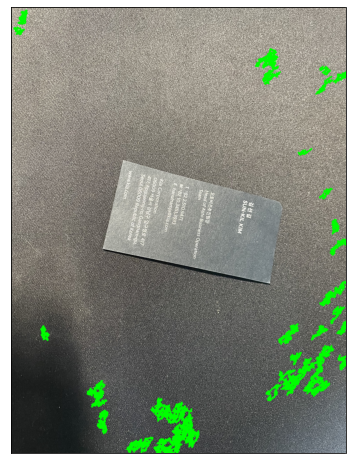

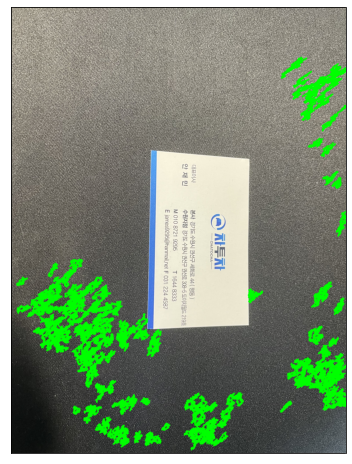

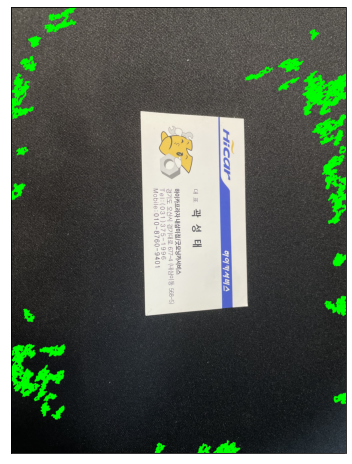

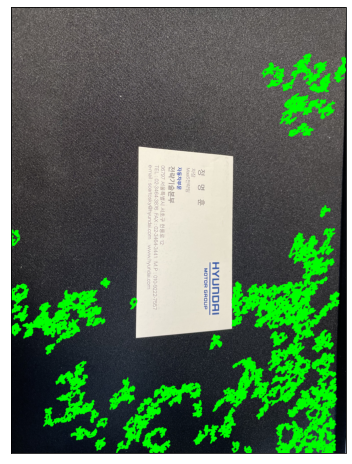

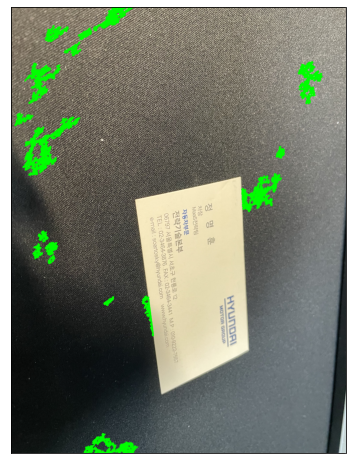

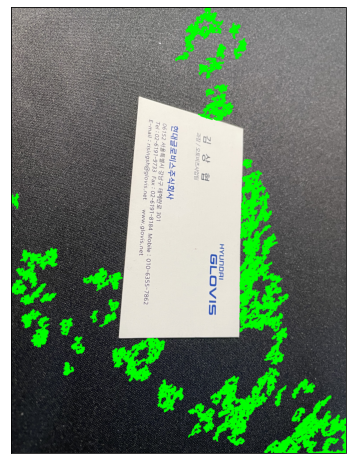

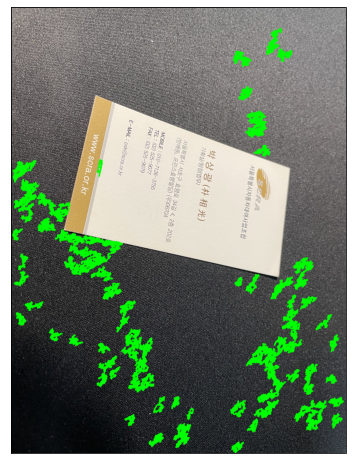

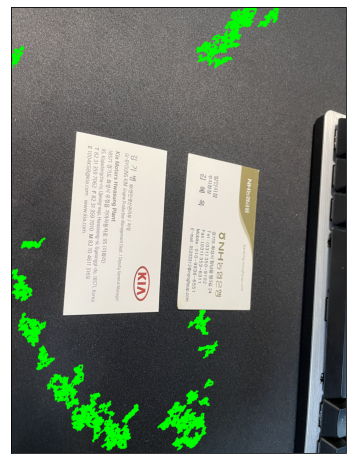

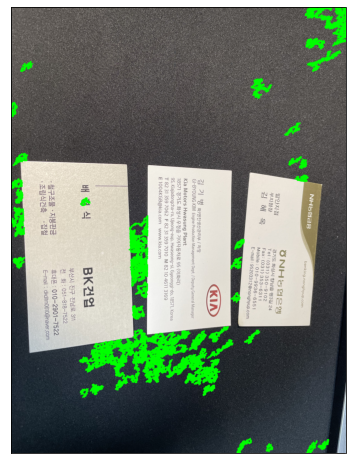

In [40]:
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

test1 = cv2.imread('/opt/ml/upstage/test_image/test1.jpg')
test2 = cv2.imread('/opt/ml/upstage/test_image/test2.jpg')
test3 = cv2.imread('/opt/ml/upstage/test_image/test3.jpg')
test4 = cv2.imread('/opt/ml/upstage/test_image/test4.jpg')
test5 = cv2.imread('/opt/ml/upstage/test_image/test5.jpg')
test6 = cv2.imread('/opt/ml/upstage/test_image/test6.jpg')
test7 = cv2.imread('/opt/ml/upstage/test_image/test7.jpg')
test8 = cv2.imread('/opt/ml/upstage/test_image/test8.jpg')
test9 = cv2.imread('/opt/ml/upstage/test_image/test9.jpg')
test_images = [test1,test2,test3,test4,test5,test6,test7,test8,test9]

# 오류 검출
for idx, image in enumerate(test_images) : 
    if image is None : 
        print(f'{idx}번째 이미지 파일에 오류가 발견되었습니다!')
        sys.exit()
# sobel filter
for image in test_images : 
    
    # 커널 생성(대상이 있는 픽셀을 강조)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    # 커널 적용 
    image_sharp = cv2.filter2D(image, -1, kernel)
    
    image_sharp_GRAY = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
    
    # 이미지 대비를 향상
    image_enhanced = cv2.equalizeHist(image_sharp_GRAY)
    
    # sobel filter
    sobelx = cv2.Sobel(image_enhanced, -1, 1, 0, ksize=3)
    sobely = cv2.Sobel(image_enhanced, -1, 0, 1, ksize=3)
    
    sobel_img = np.array(sobelx+sobely)
    
    threshold_num, image_bin = cv2.threshold(sobel_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    threshold_image = cv2.cvtColor(image_bin, cv2.COLOR_BGR2RGB)
    
    # 4. 레이블링 & 외곽선 검출
    # RETR_EXTERNAL : 최외곽 검출
    # RETR_LIST : 전부검출
    # CHAIN_APPROX_NONE : 근사화 없음
    # CHAIN_APPROX_SIMPLE : 근사화 시킴
    
    contours, _ = cv2.findContours(image_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for pts in contours :
        # 외곽선 단순화
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)
        
        # 면적 좁은경우 contours 무시
        if cv2.contourArea(pts) < 1000 : 
            continue
        # 만약 사각형이 아니면 버리기
        # 범위 설정하니까 쫌 낫다
        if (2 > len(approx)) | (8 < len(approx))  : 
            continue
        
        cv2.polylines(image, pts, True, (0,255,0),10)
        # cv2.fillPoly(bgr_gray, pts, (0,0,255))
    
    contours_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    
    plt.figure(figsize = (6,12))
    plt.imshow(contours_image)
    plt.xticks([]), plt.yticks([])
    plt.show()

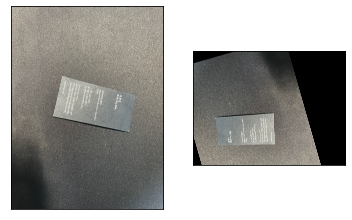

In [37]:
import sys
import cv2
from matplotlib import pyplot as plt

그림BGR = cv2.imread('/opt/ml/upstage/test_image/test1.jpg')
그림RGB = cv2.cvtColor(그림BGR, cv2.COLOR_BGR2RGB)
세로, 가로, 채널 = opencv_image.shape

대각선 = int(((가로*가로 + 세로*세로)**0.5)) # 정수여야 합니다.
회전중심 = int(가로/2), int(세로/2) # 역시 정수여야 합니다.
회전각도 = 196 # 마음대로 정하세요   
새세로, 새가로 = 세로, 가로
그림회전 = cv2.getRotationMatrix2D(회전중심, 회전각도, 1) # 1은 확대/축소값입니다.
회전결과 = cv2.warpAffine(그림RGB, 그림회전, (새세로, 새가로))

plt.subplot(1, 2, 1) # 1행 2열에서 1번째 열
plt.imshow(그림RGB)
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2) # 1행 2열에서 2번째 열
plt.imshow(회전결과)
plt.xticks([]), plt.yticks([])
plt.show()

In [38]:
cv2.imwrite('/opt/ml/upstage/test_image/test1_196rotate.jpg',회전결과)

True